## Postulación a cargo Data Analyst
### Empresa a la que postula: NeuralWorks
### Postulante: Francisco Silva
### Fecha: Diciembre 2022

In [1]:
#import librerías
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creo un objeto de conexión a la base de datos SQLite
con = sqlite3.connect("C:/Users/silva/OneDrive - kiachile/Escritorio/NeuralWorks/database.sqlite")

# Con la conexión, creo un objeto cursor para ejecutar consultas SQL
cur = con.cursor()

# vemos un listado de las tablas con el objeto cur
tablas = cur.execute('SELECT * FROM sqlite_sequence').fetchall()
print(tablas)

[('Team', 103916), ('Country', 51958), ('League', 51958), ('Match', 51958), ('Player', 11075), ('Player_Attributes', 183978), ('Team_Attributes', 1458)]


#### 1) Adjunto va un archivo .sqlite, comienza por crear una base de datos con este archivo y familiarízate con la data.

In [122]:
#creo un objeto por cada tabla, para mantener un orden y poder hacer análisis específicos por tabla posteriormente
team = pd.read_sql_query("SELECT * FROM Team", con)
country = pd.read_sql_query("SELECT * FROM Country", con)
league = pd.read_sql_query("SELECT * FROM League", con)
match = pd.read_sql_query("SELECT * FROM Match", con)
player = pd.read_sql_query("SELECT * FROM Player", con)
player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

dataframes = [team, country, league, match, player, player_attributes, team_attributes]
names = [row[0] for row in tablas]

In [4]:
#muestro un poco las dimensiones de cada tabla, para saber dónde está el volumen en registros,
#dónde está el volumen en cantidad de columnas y/o ambas
for i,j in zip(dataframes, names):
    print(j, i.shape)

Team (299, 5)
Country (11, 2)
League (11, 3)
Match (25979, 115)
Player (11060, 7)
Player_Attributes (183978, 42)
Team_Attributes (1458, 25)


In [5]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(country.shape)
country

(11, 2)


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [6]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(league.shape)
league

(11, 3)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [7]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(match.shape)
match.head()

(25979, 115)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(team.shape)
team.head(10)

(299, 5)


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [9]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(player.shape)
player.head()

(11060, 7)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(player_attributes.shape)
player_attributes.head()

(183978, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
# Hago un .head de cada tabla para familiarizarme un poco más con la data
print(team_attributes.shape)
team_attributes.head()

(1458, 25)


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


#### 2. Las tablas de Match, League, Country y Team tiene toda la información para describir un partido detalladamente.
#### - Crea una query SQL para obtener la información detallada por partido uniendo las tablas **Country, League, Match y Team**

In [12]:
#Query en texto aparte para su facilidad de entendimiento (ojo que está documentado con doble guión en cada línea)
text_query = """
    SELECT m.*,
          t.team_long_name  as home_team_long_name,   -- datos asociados al equipo que juega "por casa" del partido (home)
          t.team_short_name as home_team_short_name,  -- datos asociados al equipo que juega "por casa" del partido (home) 
          tt.team_long_name  as away_team_long_name,  -- datos asociados al equipo que juega "de visita" del partido (away)
          tt.team_short_name as away_team_short_name, -- datos asociados al equipo que juega "de visita" del partido (away)
          l.name as league_name,                      -- nombre de la liga asociada al partido
          c.name as league_country_name               -- país   de la liga asociado al partido
          FROM match as m 
          LEFT JOIN team as t 
               on t.team_api_id = m.home_team_api_id  -- cruce con la tabla team
          LEFT JOIN team as tt
               on tt.team_api_id = m.away_team_api_id -- cruce con la tabla team nuevamente, dado que es la misma tabla que tiene los datos de away
          LEFT JOIN league as l
               on l.id = m.league_id                  -- cruce con la tabla league para traer el nombre de la liga
          LEFT JOIN country as c
               on c.id = m.country_id                 -- cruce con la tabla country para traer el nombre de país asociado a la league
          """      

#ejecutamos la query a la conexión de la base de datos "con" asociada
query = pd.read_sql_query(text_query, con)

#mostramos el resultado de la query solicitada
query

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBA,BSH,BSD,BSA,home_team_long_name,home_team_short_name,away_team_long_name,away_team_short_name,league_name,league_country_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.73,3.40,4.20,KRC Genk,GEN,Beerschot AC,BAC,Belgium Jupiler League,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.75,1.91,3.25,3.60,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,Belgium Jupiler League,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.30,3.20,2.75,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,Belgium Jupiler League,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,5.50,1.44,3.75,6.50,KAA Gent,GEN,RAEC Mons,MON,Belgium Jupiler League,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.65,4.75,3.30,1.67,FCV Dender EH,DEN,Standard de Liège,STL,Belgium Jupiler League,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,FC St. Gallen,GAL,FC Thun,THU,Switzerland Super League,Switzerland
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,FC Vaduz,VAD,FC Luzern,LUZ,Switzerland Super League,Switzerland
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,Grasshopper Club Zürich,GRA,FC Sion,SIO,Switzerland Super League,Switzerland
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,Lugano,LUG,FC Zürich,ZUR,Switzerland Super League,Switzerland


Con esto logramos tener un dataframe con la información por partido de forma detallada

#### 3. ¿Qué insights ves en la información detallada del partido?

Sabemos que tenemos una fila por cada partido, ¿pero de qué se trata la data?

Primero veré qué columnas tenemos y qué significan cada una

In [13]:
# sólo se pueden ver la cantidad completa de columnas por 50 a la vez
query.columns[0:50]

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6'],
      dtype='object')

In [14]:
# sólo se pueden ver la cantidad completa de columnas por 50 a la vez (2nda parte)
query.columns[50:]

Index(['away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3',
       'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
       'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
       'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
       'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
       'away_player_9', 'away_player_10', 'away_player_11', 'goal', 'shoton',
       'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession',
       'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD',
       'BSA', 'home_team_long_name', 'home_team_short_name',
       'away_team_long_name', 'away_team_short_name', 'league_name',
       'league_country_name'],

(mantener esta celda sin ejecutar celda por favor)
Este sería el diccionario de datos que tenemos en la base:

1.   'id': id del partido (id de la tabla)
2.   'country_id': id del país donde fue el partido
3.   'league_id': id de la liga
4.   'season': años de la liga, van de a par y en años consecutivos, se dan ligas todos los años.
5.   'stage': número del stage
6.   'date': fecha del partido
7.   'match_api_id': id del match (id de la API)
8.   'home_team_api_id': id del equipo que juega home (id de la API)
9.   'away_team_api_id': id del equipo que juega away (id de la API)
10.  'home_team_goal': cantidad de goles del equipo home
11.  'away_team_goal': cantidad de goles del equipo away
12.  Desde aquí hasta la columna 'away_player_11' (66 columnas) al parecer son datos de los 11 jugadores de cada equipo del partido, lo omitiré por ahora.
78.  'goal': html de datos relacionados a goal.
79.  'shoton': html de datos relacionados a shoton.
80.  'shotoff': html de datos relacionados a shotoff.
81.  'foulcommit': html de datos relacionados a fouls (faltas).
82.  'card': html de datos relacionados a tarjetas amarillas y rojas.
83.  'cross': html de datos relacionados a cross.
84.  'corner': html de datos relacionados a corners (saques de esquina).
85.  'possession': html de datos relacionados a posessions.
86.  'B365H': Bet365 home win odds
87.  'B365D': Bet365 draw odds
88.  'B365A': Bet365 away win odds
89.  'BWH': Bet&Win home win odds
90.  'BWD': Bet&Win draw odds
91.  'BWA': Bet&Win away win odds
92.  'IWH': Interwetten home win odds
93.  'IWD': Interwetten draw odds
94.  'IWA': Interwetten away win odds
95.  'LBH': Ladbrokes home win odds
96.  'LBD': Ladbrokes draw odds
97.  'LBA': Ladbrokes away win odds
98.  'PSH': Pinnacle home win odds
99.  'PSD': Pinnacle draw odds
100. 'PSA': Pinnacle away win odds
101. 'WHH': William Hill home win odds
102. 'WHD': William Hill draw odds
103. 'WHA': William Hill away win odds
104. 'SJH': Stan James home win odds
105. 'SJD': Stan James draw odds
106. 'SJA': Stan James away win odds
107. 'VCH': VC Bet home win odds
108. 'VCD': VC Bet draw odds
109. 'VCA': VC Bet away win odds
110. 'GBH': Gamebookers home win odds
111. 'GBD': Gamebookers draw odds
112. 'GBA': Gamebookers away win odds
113. 'BSH': Blue Square home win odds
114. 'BSD': Blue Square draw odds
115. 'BSA': Blue Square away win odds
116. 'home_team_long_name': nombre completo del equipo home
117. 'home_team_short_name': nombre completo del equipo away
118. 'away_team_long_name': nombre corto del equipo home
119. 'away_team_short_name': nombre corto del equipo away
120. 'league_name': nombre completo de la liga
121. 'league_country_name': nombre del país responsable de la liga

Lo interesante de aquí, es que después de investigar mucho por internet qué eran las siglas "B365H", "BWH", hasta la variable "BSA" (desde la columna 86 a la 115), encontré la siguiente información:

1. Cada sigla que termina en H significa "HOME" (equipo 'casa')
2. Cada sigla que termina en A significa "AWAY" (equipo 'visita')
3. Cada sigla que termina en D significa "DRAW" (empate)
4. Las siglas significan noombres de plataformas de apuestas presumiblemente de UK y EU que definen algo que se llama 'odds bet', que no es otra cosa que la cantidad de dólares que retorna la plataforma si el partido llegase a terminar en el resultado que uno apostó ('H','A', ó 'D'), por otro lado, está en formato decimal, lo que significa que si por ejemplo 'B365H' es igual a '2.5', la plataforma BET365 pagará 2.5 dólares por cada dólar que hayas apostado a que el equipo 'home' ganaría ese partido, los odds van cambiando en tiempo real, por tanto si apuestas podrías encontrarte con distintos odds dependiendo del momento en que hagas la apuesta. Lo interesante es que esto se podría utilizar para estimar lo que la plataforma piensa que es más probable que pase, ya que si el odd es más alto significa que la plataforma está pagando más para esa apuesta, por tanto, a mayor odd MENOR probabilidad de que dicho evento pase (obvio, la plataforma no pagará más por algo que piensa que es más probable que pase), se hace para equilibrar oferta y demanda de apuestas entre los posibles escenarios.

Fuente:
1) https://www.vegasinsider.com/sportsbooks/bet365/odds/ para interpretar los odds
2) https://www.football-data.co.uk/notes.txt para entender qué significa cada sigla terminada en "H", "A" o "D".

Hagamos un corto análisis de B365 para saber si: Efectivamente el resultado del partido terminaba siendo el odd más  bajo, eso podría decir
qué tan buena era la plataforma para predecir el resultado del partido.

In [15]:
#dejamos sólo las columnas de interés asociadas a la plataforma BET365 y los respectivos goles de cada equipo,
#también eliminamos valores perdidos ya que impedirían hacer este análisis con solo 1 dato por fila que falte.
bet365 = query[['B365H', 'B365A', 'B365D', 'home_team_goal', 'away_team_goal']].dropna()
bet365

,B365H,B365A,B365D,home_team_goal,away_team_goal
0,1.73,5.00,3.40,1,1
1,1.95,3.60,3.20,0,0
2,2.38,2.75,3.30,0,3
3,1.44,7.50,3.75,5,0
4,5.00,1.65,3.50,1,3
...,...,...,...,...,...
24552,1.57,6.50,3.80,2,1
24553,2.25,3.40,3.25,2,0
24554,1.53,7.00,4.00,3,0
24555,2.30,3.25,3.25,1,1


In [16]:
#crearemos 2 funciones

#1) prediccion_plataforma, que elige el odd más bajo, por lo que sería lo que la plataforma apuesta más a que pase,
#si hay 2 odds que son iguales y ambos (o los 3) son el mínimo entre los 3, entonces la apuesta queda como 'indecision'.
def prediccion_plataforma(H,A,D):
    #caso en que las 3 son iguales
    if (H == D) and (H == A) and (A == D): 
        return 'indecision'
    #caso en que 2 son iguales y ambas son el mínimo en tre las 3
    elif ((min(H,D,A) == H) and (min(H,D,A) == D)) or ((min(H,D,A) == D) and (min(H,D,A) == A)) or ((min(H,D,A) == H) and (min(H,D,A) == A)):
        return 'indecision'
    #caso en que el mínimo es home
    elif min(H,D,A) == H:
        return 'home'
    #caso en que el mínimo es draw
    elif min(H,D,A) == D:
        return 'draw'
    #caso en que el mínimo es away
    else:
        return 'away'

#2) creamos la función que elige el ganador del partido, de lo contrario es "draw"
def ganador(H,A):
    if H == A:
        return 'draw'
    elif H > A:
        return 'home'
    else:
        return 'away'

#creamos la columna "apuesta" que representa lo que más cree la plataforma que más puede pasar aplicando la función prediccion_plataforma
bet365['apuesta'] = bet365.apply(lambda row: prediccion_plataforma(row.B365H, row.B365A, row.B365D), axis=1)
#creamos la coolumna "resultado_real" que representa lo que su nombre dice
bet365['resultado_real'] = bet365.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
#creamos la columna "prediccion_correcta" indicando un 1 si fue correcta y un 0 si no fue así
bet365['prediccion_correcta'] = bet365.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)
bet365

,B365H,B365A,B365D,home_team_goal,away_team_goal,apuesta,resultado_real,prediccion_correcta
0,1.73,5.00,3.40,1,1,home,draw,0
1,1.95,3.60,3.20,0,0,home,draw,0
2,2.38,2.75,3.30,0,3,home,away,0
3,1.44,7.50,3.75,5,0,home,home,1
4,5.00,1.65,3.50,1,3,away,away,1
...,...,...,...,...,...,...,...,...
24552,1.57,6.50,3.80,2,1,home,home,1
24553,2.25,3.40,3.25,2,0,home,home,1
24554,1.53,7.00,4.00,3,0,home,home,1
24555,2.30,3.25,3.25,1,1,home,draw,0


In [17]:
bet365.prediccion_correcta.mean()

0.5304975212464589

53% de las veces BET365 podía predecir bien el resultado, podemos hacer esto mismo con todas las plataformas, ¿quién predice mejor el resultado en base a la data que tenemos si usamos TODA la data y la valorizamos por igual?

** Los insight subentiendo que es con finalidad abierta (no se sabe qué fin o qué objetivo estamos persiguiendo, o qué está necesitando el negocio saber o mejorar), por tanto este análisis es sólo son el fin de responder la pregunta, ¿Qué plataforma predice mejor el resultado?

Aplicamos el mismo análisis para cada plataforma de la que tenemos data:

In [18]:
BW = query[['BWH', 'BWA', 'BWD', 'home_team_goal', 'away_team_goal']].dropna()
BW['apuesta'] = BW.apply(lambda row: prediccion_plataforma(row.BWH, row.BWA, row.BWD), axis=1)
BW['resultado_real'] = BW.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
BW['prediccion_correcta'] = BW.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)

IW = query[['IWH', 'IWA', 'IWD', 'home_team_goal', 'away_team_goal']].dropna()
IW['apuesta'] = IW.apply(lambda row: prediccion_plataforma(row.IWH, row.IWA, row.IWD), axis=1)
IW['resultado_real'] = IW.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
IW['prediccion_correcta'] = IW.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)

LB = query[['LBH', 'LBA', 'LBD', 'home_team_goal', 'away_team_goal']].dropna()
LB['apuesta'] = LB.apply(lambda row: prediccion_plataforma(row.LBH, row.LBA, row.LBD), axis=1)
LB['resultado_real'] = LB.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
LB['prediccion_correcta'] = LB.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)

PS = query[['PSH', 'PSA', 'PSD', 'home_team_goal', 'away_team_goal']].dropna()
PS['apuesta'] = PS.apply(lambda row: prediccion_plataforma(row.PSH, row.PSA, row.PSD), axis=1)
PS['resultado_real'] = PS.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
PS['prediccion_correcta'] = PS.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)

WH = query[['WHH', 'WHA', 'WHD', 'home_team_goal', 'away_team_goal']].dropna()
WH['apuesta'] = WH.apply(lambda row: prediccion_plataforma(row.WHH, row.WHA, row.WHD), axis=1)
WH['resultado_real'] = WH.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
WH['prediccion_correcta'] = WH.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)


SJ = query[['SJH', 'SJA', 'SJD', 'home_team_goal', 'away_team_goal']].dropna()
SJ['apuesta'] = SJ.apply(lambda row: prediccion_plataforma(row.SJH, row.SJA, row.SJD), axis=1)
SJ['resultado_real'] = SJ.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
SJ['prediccion_correcta'] = SJ.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)


VC = query[['VCH', 'VCA', 'VCD', 'home_team_goal', 'away_team_goal']].dropna()
VC['apuesta'] = VC.apply(lambda row: prediccion_plataforma(row.VCH, row.VCA, row.VCD), axis=1)
VC['resultado_real'] = VC.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
VC['prediccion_correcta'] = VC.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)


GB = query[['GBH', 'GBA', 'GBD', 'home_team_goal', 'away_team_goal']].dropna()
GB['apuesta'] = GB.apply(lambda row: prediccion_plataforma(row.GBH, row.GBA, row.GBD), axis=1)
GB['resultado_real'] = GB.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
GB['prediccion_correcta'] = GB.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)


BS = query[['BSH', 'BSA', 'BSD', 'home_team_goal', 'away_team_goal']].dropna()
BS['apuesta'] = BS.apply(lambda row: prediccion_plataforma(row.BSH, row.BSA, row.BSD), axis=1)
BS['resultado_real'] = BS.apply(lambda row: ganador(row.home_team_goal, row.away_team_goal), axis=1)
BS['prediccion_correcta'] = BS.apply(lambda row: 1 if (row.apuesta == row.resultado_real) else 0, axis=1)

Ahora faltaría poner los resultados en una sola tabla, ordenarlos por performance de predicción y luego graficarlos para facilidad de entendimiento

In [19]:
plataforma = ['B365', 'BW', 'IW', 'LB', 'PS', 'WH', 'SJ', 'VC', 'GB', 'BS']
df_experimento = [bet365, BW, IW, LB, PS, WH, SJ, VC, GB, BS]
promedios = [df.prediccion_correcta.mean() for df in df_experimento]

resultado_experimento = pd.DataFrame(
    zip(plataforma,promedios),
    columns=['plataforma', 'porcentaje de aciertos']
    ).sort_values(by='porcentaje de aciertos', ascending=False)
resultado_experimento

,plataforma,porcentaje de aciertos
0,B365,0.530498
7,VC,0.529245
6,SJ,0.528865
9,BS,0.527858
8,GB,0.527750
1,BW,0.526910
4,PS,0.526325
3,LB,0.526157
5,WH,0.525542
2,IW,0.518739


(0.0, 1.0)

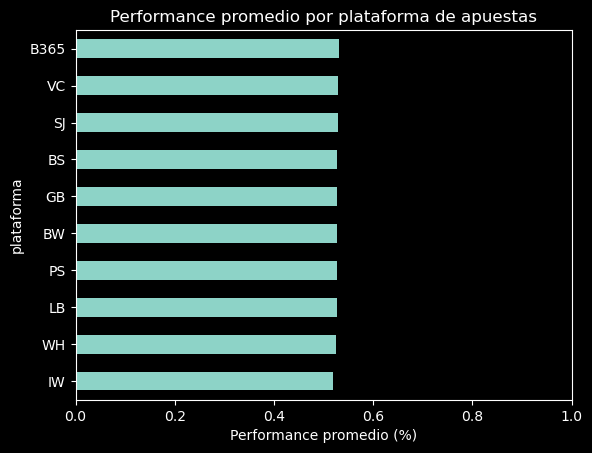

In [20]:
resultado_experimento.set_index('plataforma').sort_values(by= 'porcentaje de aciertos').plot(kind='barh', legend=False)
plt.xlabel("Performance promedio (%)")
plt.title("Performance promedio por plataforma de apuestas")
plt.xlim([0,1])

BET365 resulta ser la que mejor resultados tiene en base a este experimento, curiosamente las otras no han predicho mucho peor tampoco (todas están entre el 51,8% y el 53.0%)

In [21]:
np.std(resultado_experimento['porcentaje de aciertos'])*100

0.3052046556319

La desviación estándard es apenas del 0.31% aproximadamente, por tanto concluimos que en realidad todas las plataformas tienen un performance bien parecido.

### 4. Dado que queremos armar un equipo maravilloso nos interesa tener un perfil por cada jugador.
### Ocupa SQL y/o Python para crear un Dataframe que tenga un jugador por fila con toda la información que creas relevante

Primero haré un print de la tabla 'player' y tabla 'player_attribute' para ver la información por jugador y así facilitar la vista en el cruce de tablas, notar que la tabla 'team_attribute' tiene una fila por cada team, por tanto no viene a este caso

In [22]:
print(player.shape)
player.head()

(11060, 7)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [23]:
print(player_attributes.shape)
player_attributes.head()

(183978, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Al parecer la tabla 'player_attribute' entrega los atributos del jugador asociado a una fecha de inserción de cada registro, por tanto para nuestro interés deberíamos tomar sólo la información más reciente

In [24]:
#Esto lo podemos lograr ordenando la data de más reciente a más antigua (ascending = False), luego mostramos los
#primeros 5 registros para ver como quedó el dataframe
player_attributes.sort_values(by = ['player_api_id','date'], ascending=False).head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
8085,8086,234141,750584,2016-05-19 00:00:00,58.0,66.0,right,medium,medium,47.0,...,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0
8086,8087,234141,750584,2007-02-22 00:00:00,58.0,66.0,right,medium,medium,47.0,...,47.0,52.0,56.0,66.0,62.0,8.0,9.0,13.0,11.0,13.0
147408,147409,225462,750435,2016-04-14 00:00:00,60.0,74.0,right,medium,low,35.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147409,147410,225462,750435,2016-02-11 00:00:00,56.0,70.0,right,medium,low,35.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0
147410,147411,225462,750435,2016-02-04 00:00:00,56.0,70.0,right,medium,low,35.0,...,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0


Notamos que efectivamente tenemos más de 1 fecha de medición por jugador, por lo que es conveniente tomar la información más reciente que se tenga por cada uno, eso lo haremos seleccionando el máximo 'date' por cada jugador dentro de la tabla player_attribute.

Por otro lado, al parecer podemos elegir indistintivamente el id del jugador 'player_api_id' o bien 'player_fifa_api_id' para identificar unequívocamente a cada player, para este análisis usaré 'player_api_id'.

In [25]:
#primero generaremos un diccionario en donde la llave será el player_api_id,
#y en valores tendrémos la fecha máxima entre todas las fechas que se tienen disponibles para dicho jugador

#creamos un diccionario vacío
fechas = {}

#iteramos sobre cada id de player distinto y creamos una key del diccionario por cada jugador
for i in set(player_attributes.player_api_id):
    #luego, asignamos para cada key la máxima fecha disponible para el dataframe filtrado por dicho jugador y sólo teniendo la columna 'date'
    fechas[i] = list(player_attributes[player_attributes.player_api_id == i]['date'].sort_values(ascending=False))[0]
fechas

{163840: '2015-04-17 00:00:00',
 425985: '2016-03-03 00:00:00',
 32769: '2015-09-21 00:00:00',
 163843: '2014-03-14 00:00:00',
 425988: '2016-04-28 00:00:00',
 32776: '2012-02-22 00:00:00',
 393232: '2016-04-28 00:00:00',
 32786: '2016-04-28 00:00:00',
 32788: '2015-01-16 00:00:00',
 426005: '2016-05-12 00:00:00',
 131117: '2015-05-29 00:00:00',
 163887: '2015-07-03 00:00:00',
 163892: '2015-11-06 00:00:00',
 98357: '2008-08-30 00:00:00',
 458806: '2016-05-12 00:00:00',
 163893: '2015-11-26 00:00:00',
 393272: '2016-03-10 00:00:00',
 32825: '2009-02-22 00:00:00',
 163897: '2015-07-03 00:00:00',
 98361: '2016-06-02 00:00:00',
 458808: '2014-09-18 00:00:00',
 163901: '2016-04-14 00:00:00',
 360509: '2014-04-04 00:00:00',
 32829: '2015-09-25 00:00:00',
 98363: '2014-04-18 00:00:00',
 32831: '2015-01-09 00:00:00',
 458810: '2013-09-20 00:00:00',
 98369: '2009-08-30 00:00:00',
 32836: '2012-08-31 00:00:00',
 163907: '2016-01-14 00:00:00',
 98374: '2015-07-03 00:00:00',
 98375: '2015-05-08 0

In [26]:
len(fechas)

11060

Efectivamente obtuvimos una key por cada player que existe dentro de la tabla 'player' :)

In [27]:
#solo para mostrar que el largo del diccionario "fechas" es el mismo que el largo (shape[0]) del dataframe 'player'
player.shape[0]

11060

Ahora sólo falta filtrar player_attributes por solo las fechas máximas que corresponden a cada jugador

In [28]:
#generamos una de player_attributes
atributos_filtrado = player_attributes.copy() #esta es una buena práctica para manejar dataframes filtrados y distintos al original

#creamos la columna 'ultima_maxima' con la máxima fecha disponible para cada jugador
atributos_filtrado['ultima_maxima'] = atributos_filtrado.apply(
    lambda row: 1 if row.date == fechas[row.player_api_id] else 0, axis=1)
#filtramos por sólo la fecha máxima (ultima_maxima = 1)
atributos_filtrado =atributos_filtrado[atributos_filtrado.ultima_maxima == 1]
atributos_filtrado

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,ultima_maxima
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,1
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,1
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,183925,2488,26357,2015-03-06 00:00:00,73.0,73.0,right,low,medium,42.0,...,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0,1
183937,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0,1
183953,183954,111191,36491,2011-02-22 00:00:00,68.0,73.0,left,None,_0,64.0,...,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0,1
183960,183961,47058,35506,2011-02-22 00:00:00,67.0,78.0,right,None,_0,48.0,...,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0,1


Notamos que tenemos 4 jugadores que tienen más de 1 registro en la misma fecha máxima, veremos si son registros repetidos o si uno y sólo uno de ellos no tiene valores perdidos

In [29]:
#mostramos los 4 casos que mencionamos recientemente
atributos_filtrado.player_api_id.value_counts()[:5]

C:\Users\silva\AppData\Local\Temp/ipykernel_1784/1765878453.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  atributos_filtrado.player_api_id.value_counts()[:5]


110189    2
178196    2
193866    2
41308     2
371538    1
Name: player_api_id, dtype: int64

In [30]:
#mostramos los casos que queremos dejar
atributos_filtrado[atributos_filtrado.player_api_id.isin([41308, 193866, 178196,110189])].dropna()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,ultima_maxima
51007,51008,117343,41308,2013-09-20 00:00:00,66.0,66.0,right,medium,medium,50.0,...,70.0,25.0,40.0,35.0,14.0,13.0,13.0,8.0,6.0,1
129772,129773,148581,110189,2016-03-17 00:00:00,78.0,80.0,right,medium,medium,77.0,...,76.0,37.0,48.0,44.0,12.0,11.0,12.0,10.0,13.0,1
138954,138955,148337,193866,2016-04-28 00:00:00,77.0,78.0,left,None,8,22.0,...,27.0,74.0,79.0,85.0,12.0,13.0,9.0,6.0,10.0,1
141159,141160,193767,178196,2013-09-20 00:00:00,62.0,62.0,right,medium,high,38.0,...,58.0,21.0,48.0,53.0,14.0,6.0,15.0,14.0,13.0,1


Efectivamente 1 de los casos de cada jugador repetido no tiene nulos, por lo que nos quedaremos con esos casos.

Lo siguiente será quitar las filas del dataframe 'atributos_filtrado' que tienen datos nulos que están dentro de los 4 casos anteriormente mencionados

In [31]:
# tenemos que generar una lista con los ids que nos interesa sacar
ids_a_sacar = atributos_filtrado[atributos_filtrado.player_api_id.isin([41308, 193866, 178196,110189])]
ids_a_sacar = list(ids_a_sacar[ids_a_sacar.isna().any(axis=1)]['id'])
ids_a_sacar

[51009, 129798, 138979, 141161]

In [32]:
# con los ids identificados, solo falta sacarlos del dataframe atributos_filtrado
cuatro = atributos_filtrado[~atributos_filtrado.id.isin(ids_a_sacar)]
cuatro

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,ultima_maxima
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,1
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,1
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,183925,2488,26357,2015-03-06 00:00:00,73.0,73.0,right,low,medium,42.0,...,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0,1
183937,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0,1
183953,183954,111191,36491,2011-02-22 00:00:00,68.0,73.0,left,None,_0,64.0,...,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0,1
183960,183961,47058,35506,2011-02-22 00:00:00,67.0,78.0,right,None,_0,48.0,...,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0,1


¡Con esto tenemos 1 registro por cada jugador en una tabla ya limpia, sin duplicados, teniendo la información más recien, y con menor cantidad de valores perdidos posibles!

In [33]:
#Ahora, hablando de valores perdidos... ¿cuál es la cantidad de valores perdidos que tenemos?
cuatro.isnull().sum()

id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    540
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                478
dribbling                0
curve                  478
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                478
reactions                0
balance                478
shot_power               0
jumping                478
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                 478
penalties                0
marking                  0
standing_tackle          0
sliding_tackle         478
g

Notar que no son pocos, pero eso lo analizaremos en pasos siguientes, por ahora solo los dejaremos de forma "gráfica"

<AxesSubplot:>

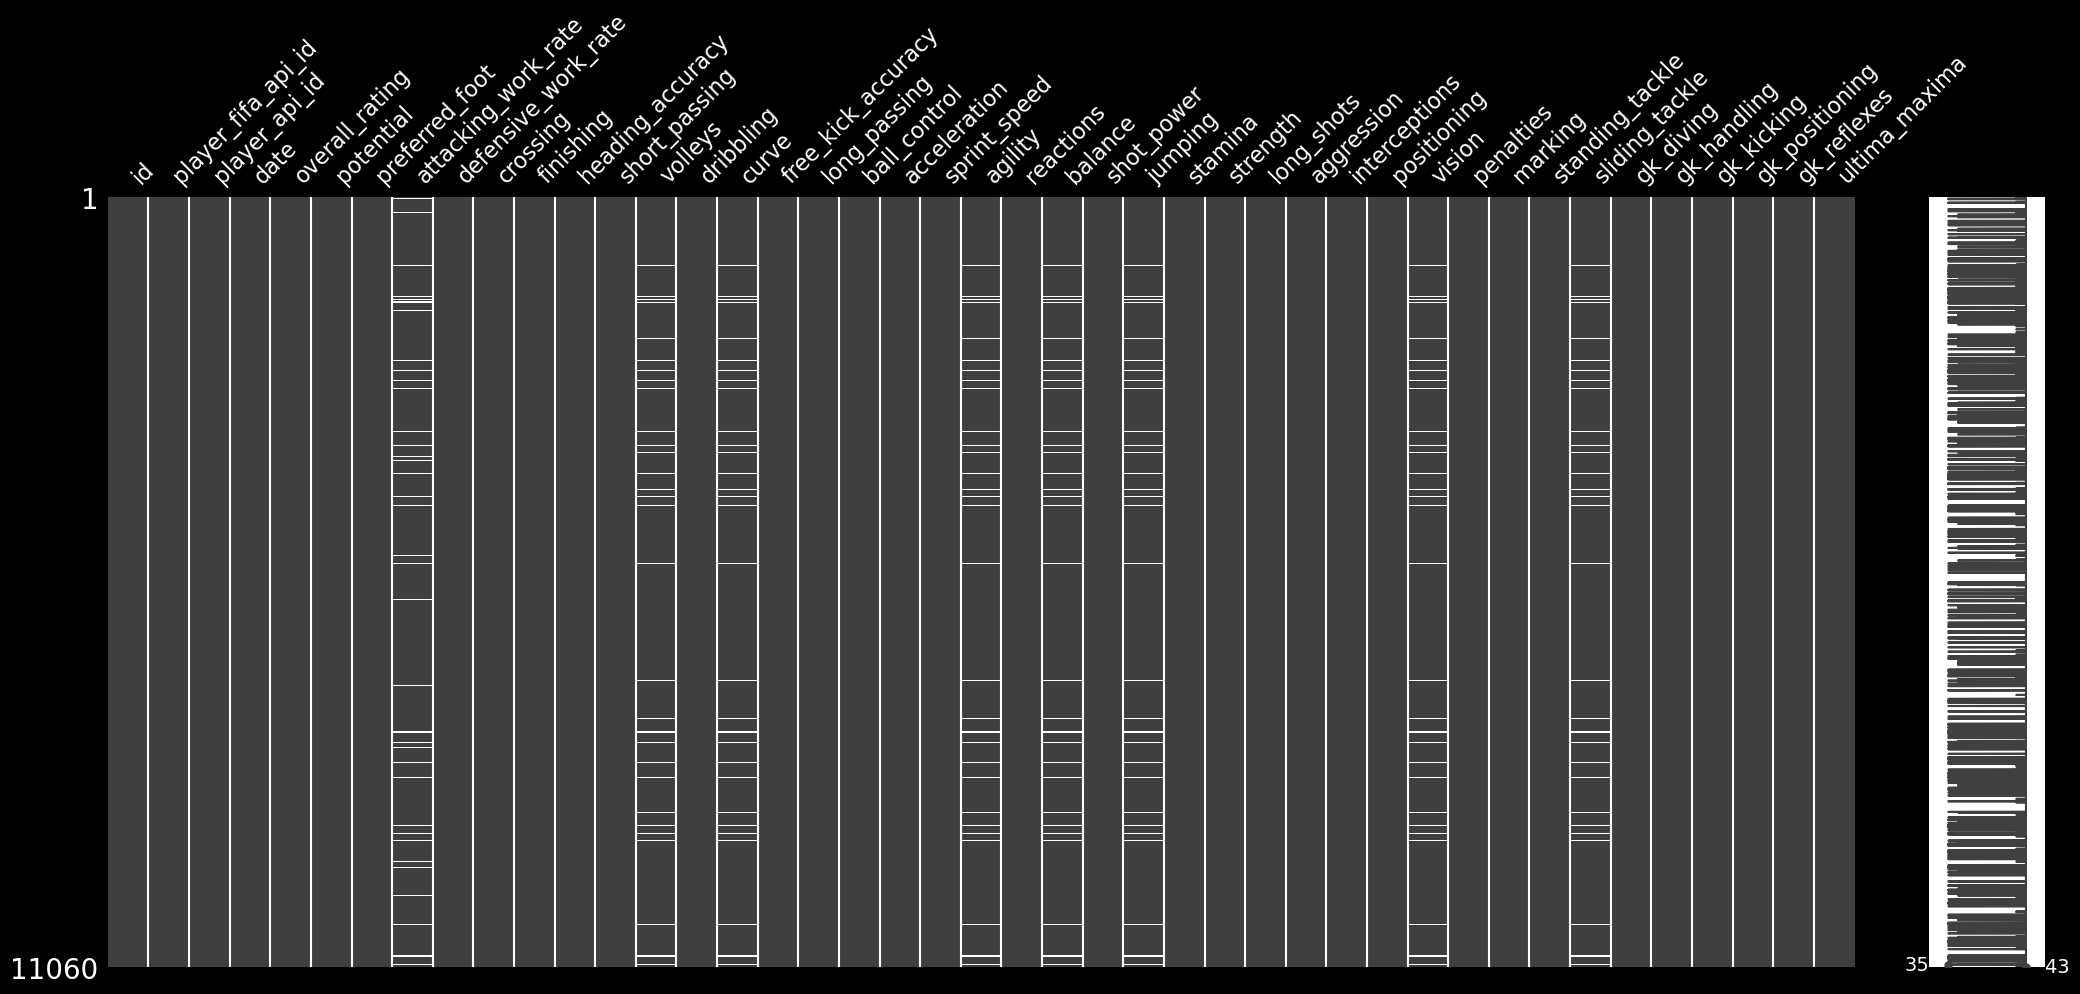

In [49]:
#Me gustaría ver gráficamente cómo estamos en términos generales de valores nulos
import missingno as msno
msno.matrix(cuatro)

Notar que son sólo ciertas columnas que tienen valores nulos, además, al parecer cuando dicho registro tiene un valor nulo, entonces las columnas en cuestión que tienen valores nulos, también tendrán null en dicho valor. Por tanto estamos tentados a eliminar dichas columnas que tienen valores nulos más que los jugadores mismos.

Por último nos falta cruzar esta tabla con la tabla 'player'.

In [35]:
cuatro = cuatro.merge(player, on = 'player_api_id', how='left')
cuatro.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,ultima_maxima,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,9.0,9.0,12.0,1,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,12.0,9.0,13.0,1,3,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,13.0,12.0,11.0,1,4,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,16.0,12.0,11.0,1,5,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,183925,2488,26357,2015-03-06 00:00:00,73.0,73.0,right,low,medium,42.0,...,11.0,8.0,12.0,1,11071,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,5.0,5.0,8.0,1,11072,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,183954,111191,36491,2011-02-22 00:00:00,68.0,73.0,left,None,_0,64.0,...,5.0,6.0,6.0,1,11073,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,183961,47058,35506,2011-02-22 00:00:00,67.0,78.0,right,None,_0,48.0,...,15.0,10.0,12.0,1,11074,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


¡Listo! Tenemos un dataframe final llamado 'cuatro' limpio y teniendo la mayor cantidad de detalles posibles

#### 5. ¿Qué insights ves en el perfil por jugador? ¿Qué data crees que es relevante para elegir a los mejores jugadores?

##### I) ¿Qué tipos de jugadores existen?

Primero tenemos que pensar que para decir si un jugador es bueno o no, tenemos que decir que necesitamos distintos tipos de jugadores, definiré un equipo de 11 jugadores compuesto por los siguientes tipos de jugador con sus respectivas cantidades:

* Arquero: Necesitamos sólo 1 arquero.
* Defensas: Quiero que este equipo esté conformado por 4 defensas.
* Centros: Quiero que este equipo esté conformado por 3 centro campistas.
* Delanteros: Quiero uqe este equipo esté conformado por 3 delanteros.


Un delantero jamás podrá ser definido como buen jugador si siempre lo ponemos al arco (asumiendo que sólo sabe jugar de  delantero), por tanto necesitamos 4 tipos de jugadores según lo expuesto en el listado de arriba.

##### II) ¿Qué data tenemos disponible? Hagamos una descripción de las columnas disponibles

In [37]:
#Para ello necesitamos, al igual que el inciso 3) necesitamos ver todas las columnas
cuatro.columns

Index(['id_x', 'player_fifa_api_id_x', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'ultima_maxima', 'id_y', 'player_name',
       'player_fifa_api_id_y', 'birthday', 'height', 'weight'],
      dtype='object')

In [60]:
#Omito las primeras 4 columnas, dado que no son tan relevantes a la hora de elegir qué jugadores son buenos o malos
cuatro.iloc[:,4:24].head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0
1,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0
2,65.0,67.0,right,medium,medium,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0
3,69.0,69.0,right,medium,medium,57.0,21.0,68.0,65.0,48.0,56.0,38.0,40.0,61.0,62.0,33.0,34.0,62.0,57.0,41.0
4,70.0,70.0,right,medium,medium,46.0,34.0,73.0,65.0,33.0,47.0,42.0,25.0,58.0,58.0,33.0,31.0,41.0,68.0,52.0


In [61]:
#No muestro las 44 en adelante, dado que desde la columna 'última_maxima' en adelante, no son columnas que muestren performance del jugador
cuatro.iloc[:,24:44].head()

,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,ultima_maxima,id_y
0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,1
1,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1,2
2,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,1,3
3,59.0,71.0,49.0,90.0,29.0,70.0,62.0,26.0,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,1,4
4,48.0,67.0,60.0,75.0,26.0,66.0,68.0,29.0,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,1,5


Diciconario de columnas de la tabla 'cuatro'

1.  'id_x': id de la tabla 'player_attribute', no nos sirve mucho
2.  'player_fifa_api_id_x': id de la api de fifa, tampoco nos sirve mucho para este ejercicio
3.  'player_api_id': id de la api, tampoco nos sirve mucho para este ejercicio
4.  'date': fecha de ingreso de la data
5.  'overall_rating': al parecer es una forma de asignar un performance por jugador en términos generales
6.  'potential': al parecer tiene relación con la oclumna 6, quizás significa lo que potencialmente puede rendir el jugador en teoría
7.  'preferred_foot': si el jugador es diestro o zurdo
8.  'attacking_work_rate',: performance como atacante/delantero
9.  'defensive_work_rate': performance como defensor
10. 'crossing': performance para un tiro medio o largo que pase con la intencion de generar una oportunidad de gol
11. 'finishing': performance de finishing, cuando ya tienes la pelota cerca del arco enemigo y estas intentando hacer un gol
12. 'heading_accuracy': performance de puntería cuando golpean la pelota con la cabeza
13. 'short_passing': performance de un pase corto
14. 'volleys': performance de golpear la pelota cuando te la pasan o la recibes y todavía no da bote.
15. 'dribbling': performance para moverte junto con la pelota, avanzar o retroceder.
16. 'curve': performance para tirar la pelota con curva
17. 'free_kick_accuracy': performance de puntería cuando haces un tiro libre
18. 'long_passing': performance cuando hacer un pase largo
19. 'ball_control': performance de control de la pelota
20. 'acceleration': performance asociado a aceleracion
21. 'sprint_speed': performance asociado a hacer sprint, correr muy rapido por la cancha
22. 'agility': performance asociado a agilidad
23. 'reactions': performance para reaccionar a eventos
24. 'balance': performance asociados al balance
25. 'shot_power': performance asociado a la fuerza para golpear la pelota
26. 'jumping': performance asociado a saltar
27. 'stamina': performances asociado a stamina, resistencia, estado físico
28. 'strength':  performance asociado a fortaleza del jugador
29. 'long_shots': performance para hacer tiro largo
30. 'aggression': performance de agresión del jugador, qué tan agresivo juega
31. 'interceptions': performance para interceptar la pelota en movimiento
32. 'positioning': performance asociado a posicionarse como jugador
33. 'vision': performance asociado a la vision del jugador dentro de la cancha
34. 'penalties': performance asociado a los penales que hace el jugador
35. 'marking': performance asociado al marcar a otros jugadores, por supuesto del equipo contrario
36. 'standing_tackle': performance asociado a cuando permaneces de pie e intentas quitar la pelota
37. 'sliding_tackle': performance asociado a cuando haces un sliding intentando quitar la pelota
38. 'gk_diving': performance asociado al goalkeeper, especificamente al diving
39. 'gk_handling': performance asociado al goalkeeper, especificamente al handling
40. 'gk_kicking': performance asociado al goalkeeper, especificamente al kicking
41. 'gk_positioning': performance asociado al goalkeeper, especificamente al positioning
42. 'gk_reflexes': performance asociado al goalkeeper, especificamente a sus reflejos
43. 'ultima_maxima': no aplica
44. 'id_y': no aplica
45. 'player_name': nombre del jugador
46. 'player_fifa_api_id_y': no aplica
47. 'birthday': cumpleaños del jugador
48. 'height': altura del jugador
49. 'weight': peso del jugador

##### III) Por tanto, ¿Qué data diría que es relevante para elegir a los mejores jugadores?

Primero notar que todas las columans numéricas que evidencian el performance de cada jugador están en la misma escala (de 0 a 100).

Para responder la pregunta, y en términos generales, la columna "overall_rating" se ve como un buen candidato para elegir los mejores jugadores

In [59]:
cuatro[['overall_rating', 'player_name']].sort_values(by='overall_rating', ascending=False)[0:5]

,overall_rating,player_name
6169,94.0,Lionel Messi
1992,93.0,Cristiano Ronaldo
7855,90.0,Neymar
6546,90.0,Manuel Neuer
6369,90.0,Luis Suarez


En efecto, ¡los primeros 5 jugadores son conocidísimos!, y lo que me gustó de la data, es que no coloca solo delanteros que meten goles como "Lionel Messi" y "Cristiano Ronaldo", sino también "Manuel Neuer" (Jugador Alemán que juega como arquero)

#### 5. BONUS: ¿Cuál es tu sugerencia de jugadores para armar el mejor equipo de la historia? Argumenta tu respuesta.

Como dije anteriormente, yo eligiría:

- 1 arquero
- 4 defensas
- 3 mediocampistas
- 3 delantero

Total = 11 jugadores, ¿pero en base a qué columnas elijo a cada rol dentro de la cancha? lo siguiente es decir qué columnas eligiría para cada rol:

Para el rol de ARQUERO, y sólo por hacer un análisis simple, haría un promedio lineal de las siguientes 5 columnas:

- gk_diving: Directa relación como arquero (goalkeeper)
- gk_handling: Directa relación como arquero (goalkeeper)
- gk_kicking: Directa relación como arquero (goalkeeper)
- gk_positioning: Directa relación como arquero (goalkeeper)
- gk_reflexes: Directa relación como arquero (goalkeeper)
- overall_rating: Es un buen KPI, capturaría bien a un buen jugador por el simple hecho de que la columna indica eso.

Para el rol de DEFENSA haría un promedio simple entre las siguientes columnas:

- defensive_work_rate: Directa relación como defensa
- marking: pienso que deben estar más atentos a marcar que el resto de las posiciones.
- overall_rating: Es un buen KPI, capturaría bien a un buen jugador por el simple hecho de que la columna indica eso.

Para el rol de delantero haría un promedio simple entre las siguientes columnas:

- attacking_work_rate: Directa relación como delantero
- volleys: Dado que un delantero debiera recibir más la pelota en el aire por pases largo, corner kicks y similares
- heading_accuracy: Dado que debería tener más puntería con la cabeza para realizar goles por tiros de esquina.
- finishing: Muy importante para hacer un gol, es la capacidad para estando cerca del arco hacer un gol.
- overall_rating: Es un buen KPI, capturaría bien a un buen jugador por el simple hecho de que la columna indica eso.

Para el rol de mediocampista está más difícil, dado que no hay una columna de "midfielder" o similar, sin embargo haría un promedio simple entre las siguientes columnas:

- short_passing:  Performance de un pase corto, como medio campista debes darle pases y ayudar a los delanteros para llegar al arquero enemigo
- long_passing: Performance cuando hacer un pase largo, como medio campista debes darle pases y ayudar a los delanteros para llegar al arquero enemigo
- stamina: Los medio campista son los que más corren en el juego, deben tener buena stamina
- agility: Muy relacionado a lo anterior, por moverse en general más en la cancha que el resto, deben ser basante ágiles
- overall_rating: Es un buen KPI, capturaría bien a un buen jugador por el simple hecho de que la columna indica eso.

Las columnas 'defensive_work_rate' y 'attacking_work_rate', tienen valores nulos y no numericos, por tanto debemos limpiar estos valores antes de promediar

In [85]:
#partamos con defensive_work_rate
cuatro.defensive_work_rate.isnull().sum() # no tiene nulos

#pero tienes valores no numéricos, por simplicidad, tomaremos sólo los valores = 'high'
cuatro.defensive_work_rate.value_counts()

medium    7311
high      1555
low       1041
_0         540
o          278
ormal       66
1           39
2           33
3           27
5           26
7           21
ean         21
6           19
0           16
9           16
es          16
tocky       15
4           13
8            7
Name: defensive_work_rate, dtype: int64

In [88]:
#veamos como viene attacking_work_rate
cuatro.attacking_work_rate.isnull().sum() # tiene nulos

#nuevamente por simplicidad tomaremos solo los 'high'
cuatro.attacking_work_rate.value_counts()

medium    6967
high      2375
low        565
None       495
norm        66
le          21
y           16
stoc        15
Name: attacking_work_rate, dtype: int64

In [114]:
cols_arquero    = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'player_name']
cols_defensa    = ['overall_rating', 'marking', 'player_name']
cols_delanteros = ['volleys', 'heading_accuracy', 'finishing', 'overall_rating', 'player_name']
cols_mediocamp  = ['short_passing', 'long_passing', 'stamina', 'agility', 'overall_rating', 'player_name']

In [120]:
arquero = cuatro[cols_arquero]
defensas = cuatro[cuatro.defensive_work_rate == 'high'][cols_defensa]
delanteros = cuatro[cuatro.attacking_work_rate == 'high'][cols_delanteros]
mediocamp = cuatro[cols_mediocamp]

def promediar(columnas):
    return np.median()

arquero['key_KPI'] = arquero.apply(lambda row: (row[0]+row[1]+row[2]+row[3]+row[4])/5, axis=1)
defensas['key_KPI'] = defensas.apply(lambda row: (row[0]+row[1])/2, axis=1)
delanteros['key_KPI'] = delanteros.apply(lambda row: (row[0]+row[1]+row[2]+row[3])/4, axis=1)
mediocamp['key_KPI'] = mediocamp.apply(lambda row: (row[0]+row[1]+row[2]+row[3]+row[4])/5, axis=1)

mi_arquero = arquero.sort_values(by='key_KPI', ascending=False)[['player_name', 'key_KPI']][0:1]
mis_defensas = defensas.sort_values(by='key_KPI', ascending=False)[['player_name', 'key_KPI']][0:4]
mis_delanteros = delanteros.sort_values(by='key_KPI', ascending=False)[['player_name', 'key_KPI']][0:3]
mis_mediocampistas = mediocamp.sort_values(by='key_KPI', ascending=False)[['player_name', 'key_KPI']][0:3]

mi_arquero['Rol']         = 'Arquero'
mis_defensas['Rol']       = 'Defensa'
mis_delanteros['Rol']     = 'Delanteros'
mis_mediocampistas['Rol'] = 'Mediocampista'

C:\Users\silva\AppData\Local\Temp/ipykernel_1784/640368289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arquero['key_KPI'] = arquero.apply(lambda row: (row[0]+row[1]+row[2]+row[3]+row[4])/5, axis=1)
C:\Users\silva\AppData\Local\Temp/ipykernel_1784/640368289.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediocamp['key_KPI'] = mediocamp.apply(lambda row: (row[0]+row[1]+row[2]+row[3]+row[4])/5, axis=1)


In [121]:
mi_equipo_estrella = pd.concat([mi_arquero, mis_defensas, mis_delanteros, mis_mediocampistas])
mi_equipo_estrella

,player_name,key_KPI,Rol
6546,Manuel Neuer,88.00,Arquero
10172,Thiago Silva,89.00,Defensa
3862,Giorgio Chiellini,88.00,Defensa
676,Andrea Barzagli,87.50,Defensa
8587,Philipp Lahm,86.50,Defensa
1992,Cristiano Ronaldo,90.25,Delanteros
942,Aritz Aduriz,86.25,Delanteros
6369,Luis Suarez,86.00,Delanteros
6381,Luka Modric,87.20,Mediocampista
6169,Lionel Messi,85.60,Mediocampista
